##MatSeg-Colab
This is an example of MatSeg being run on a Google Colab instance. To use it, ensure the following:


1.   You have hardware accelerator set to GPU under `Edit->Notebook Settings->Hardware Accelerator`
2.   You have the MatSeg folder saved somewhere on your Google Drive. Adjust the `matseg_dir` variable to the location of this folder. This variable can be found in the imports cell.

If both of those things have been taken care of, move down to 'Install Dependencies and Mount Google Drive.' It should prompt you to click a link and enter an authentication code to let it mount your drive.

Afterwards, go to the next code cell. Make sure that `matseg_dir` is set here and then run the cell. After that, you should be able to run the different MatSeg functions under 'Usage of MatSeg' and see the outputs in your Google Drive folder.

#Install Dependencies and Mount Google Drive

In [1]:
!pip install torchnet

     |████████████████████████████████| 686kB 9.7MB/s 
     |████████████████████████████████| 204kB 16.6MB/s 
  Created wheel for torchnet: filename=torchnet-0.0.4-cp36-none-any.whl size=29747 sha256=e8c502699e80660dfad0dfce9e4ff5d66aa7416f6e0be309e711ec76cd3ce041
  Stored in directory: /root/.cache/pip/wheels/e1/03/fb/1c212c2f20905cdf97fe39022946cf16b8e66ed754a6663400
  Created wheel for visdom: filename=visdom-0.1.8.9-cp36-none-any.whl size=655251 sha256=b1decf84e668567bdc52b4ac07edcc5dd9c4e59b557cf9f08cc8f30d36a4ce21
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp36-none-any.whl size=5711 sha256=9b2f4ee518c39d0086e9e6abc2e6c2d6b9f8429f9b82009057f3bd054c904272
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built torchnet visdom torchfile


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
matseg_dir = '/content/drive/My Drive/MatSeg_Notebook'
import os
os.chdir(matseg_dir)
import config
import features
import cropping
import utils
from main import main
from apply import apply
import models
from colab_wrapper import *

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch

#Usage of MatSeg

##Converting images to numpy arrays via `image2npy`
`image2npy` is called as follows:
```
run_image2npy(dataset, subdirectory)
```
This creates the numpy arrays for the ground truths

An example is shown below:

In [ ]:
run_image2npy("ss", "test")

Enter Number of Label Classes: 2
Numpy Array Directory Not Empty!
Would you like to continue? y


Initializing: 100%|██████████| 1/1 [00:01<00:00,  1.11s/ files]


Number of Classes:   2
Maximum Pixel Value: 255

Image: Testgt_full_1_000001
After Transform...
Unique Values: [0 1]
Array Dimension: 2

Done! Time Taken:        1.160 seconds
Normalized Arrays?       True
Correct Array Dimension? True


## Define a new configuration

Models in MatSeg are defined through configurations, which are split into datasets and versions. A "dataset" is defined as the folder in which the training, validation, and testing images are located. Datasets can be added using the `add_dataset` command. This requires 3 positional arguments:
* `dataset`: a string with the dataset name, this is the same as the name of the folder in `data` where the images are located.
* `n_class`: the number of different classes the image should be segmented into.
* `size`: a 2-tuple of the image width and height.

This function also accepts default values for epoch, batch_size, and learning rate hyperparameters as optional arguments (see below for hyperparameter descriptions).

For instance, here we create a new dataset for serial sectioning data located in the data/ss folder:





In [ ]:
add_dataset('ss', 2, (1689, 985))

Added new dataset ss


True

For each dataset, a particular model and hyperparameter setup can be defined as a "version". Versions are created using the `add_version` command. This command takes one positional argument: the name of the dataset to add the version to. In order to specify a version number, use the `version_number` positional argument. Without this positional argument, version numbers will be continually added (the first version is v1, v2, etc.).

All versions must contain a `model` argument to specify the model that is used, one of 'pixelnet', 'unet', and 'segnet'. `add_version` also accepts the following positional arguments for model hyperparameters:

* `batch_size`: int (this however should be kept at 1 to avoid running out of memory on Colab)
* `shuffle`: boolean
* `balance`: boolean
* `optimizer`: string, likely either `Adam` or `SGD`
* `lr`: (learning rate) float
* `patience`: int
* `epoch`: int
* `aug`: boolean

Here is an example of defining a version for our ss dataset with some hyperparameters:

In [6]:
add_version('tomography', model='unet', epoch=8, optimizer='SGD', batch_size=1, lr=0.01, aug=True, shuffle=True, patience=16, balance=True)

Saved version v10 of dataset tomography


True

All datasets and versions are saved in `configs.json` and will be preserved across runtimes.

##Train a neural network with `main`
`main` with training can be called as follows:
```
run_main(dataset, "train", version)
```
This will train a network on the images and ground truths available in the `dataset` folder.

`run_main` also accepts 2 optional arguments relevant for training:

* `gpu`: Whether to use the GPU (since Colab provides a GPU, set this to true!)
* `save`: Whether to save the resulting models (you'll probably want this too)

An example is shown below:

In [8]:
run_main("tomography", "train", "v10", gpu=True, save=True)

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1:
learning rate = 0.01


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional.py:70: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  img = torch.from_numpy(np.array(pic, np.int32, copy=False))
  0%|          | 0/30 [00:00<?, ?it/s]


RuntimeError: ignored

##Evaluate a neural network with `main`
`main` with evaluation can be called as follows:
```
run_main(dataset, "evaluate", version)
```
This will train a network on the images and ground truths available in the `dataset` folder.

`run_main` also accepts 3 optional arguments relevant for training:

* `gpu`: Whether to use the GPU (since Colab provides a GPU, set this to true!)
* `test_folder`: Directory within the dataset to test on (likely will be the default, `'test'`)
* `overlay`: Whether to also save overlays (see later cells for how to use these)

An example is shown below:

In [ ]:
run_main("ss", "evaluate", "v1", test_folder="test", gpu=True, overlay=True)

100%|██████████| 1/1 [00:01<00:00,  1.13s/it]


--- evaluation result ---
precision: [0.96728 0.90045] 0.9338675716333867
recall: [0.97769 0.85919] 0.9184420656665909
IoUs: [0.94639 0.78466] 0.8655276739979607
BF1 Score: [0.97246 0.87934] 0.9258990148587782
loss: 0.11703, accuracy: 0.95515, mIU: 0.86553
Overlay for Image 'Test_full_1_000001' Saved!
Time Taken:    0.681 seconds



## View generated evaluate overlays
Evaluation using `main` generates overlay images that display correct positive segmentations in white, correct negatives in black, incorrect positives in green, and incorrect negatives in pink.

These images can be viewed in the notebook using a simple image viewing function like `plt.imshow()`.

Using %pylab inline at the beginning of your cell enables images to be viewed from within the notebook.

Populating the interactive namespace from numpy and matplotlib


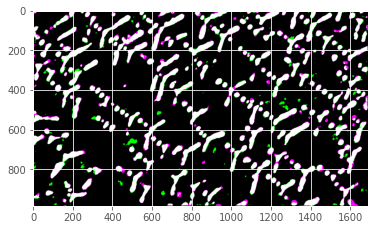

In [ ]:
%pylab inline
img = mpimg.imread(matseg_dir + '/data/ss/test/overlays/v1_segnet/Test_full_1_000001_overlay.png')
plt.figure()
imgplot = plt.imshow(img)
plt.show()

##Apply a neural network to model unseen images
Apply is called as follows:

`run_apply(dataset, version, image_folder)`

This will apply a neural network trained to images from `image_folder`. It will pull the configuration from `config` under `Config->Configuration->config` with the same `dataset` and `version`

`run_apply` also has an optional `gpu` argument that can be set to True to use the GPU.

An example is shown below:

In [ ]:
run_apply("tomography", "v7", "tomography_full", gpu=True)

Segmenting.....:   0%|          | 0/2 [00:00<?, ?image/s]

Segmentation Underway...



Segmenting.....: 100%|██████████| 2/2 [00:02<00:00,  1.04s/image]


Image Segmentation Complete!

Average Time per Image: 6.798 seconds
Total Time Taken:       00:00:13
